Q1:The standard deviation indicates the extent to which individual data points in a data set differ from the mean, reflecting the overall distribution of the data. In contrast, the standard error of the mean measures the accuracy of the sample mean in estimating the true overall mean on the basis of repeated sampling.The SD shows the degree of dispersion of the data, while the SEM highlights the precision of the estimate of the mean, with smaller values of the SEM indicating more precise estimates as the sample size increases.

Q2:To create a 95% confidence interval using the standard error of the mean, we take the sample mean and add and subtract a margin, which is based on the SEM. This gives us a range that is likely to contain the true population mean 95% of the time.

Q3:To create a 95% bootstrapped confidence interval, you sort the bootstrapped sample means and take the values at the 2.5th and 97.5th percentiles. This gives you the range that contains 95% of the bootstrapped means, without needing to calculate the standard error.

Q4:(bootstrap_confidence_interval) function: This function allows for flexibility in the statistic being calculated. By default, it calculates the mean, but you can change it to any other statistic by passing a different (stat_function).
Confidence interval for the mean: Uses (np.mean) to calculate the sample mean for each bootstrap sample.
Confidence interval for the median: By changing (stat_function=np.median), you can calculate a confidence interval for the median instead of the mean.


Q5:We distinguish between the population parameter and the sample statistic because the population parameter is unknown, while the sample statistic is calculated from the data we have. Confidence intervals use the sample statistic to estimate the likely range for the unknown population parameter.

Q6:
1.Bootstrapping is when you take your sample data and create lots of new samples from it by randomly picking values. Then, you calculate the average for each of these new samples. It helps you see how your results might change if you had slightly different data.
2.The main purpose of bootstrapping is to figure out how confident you can be about your estimate, like the average. It gives you a range of possible values that the real number might fall into.
3.You could use bootstrapping to create a bunch of averages from your sample. Then, you’d see if your guessed average is within the range of those averages. If it is, your guess is probably okay. If it’s not, your guess might be wrong.

Q7:A confidence interval overlapping zero means that zero is a possible value for the true effect (like the drug's impact) based on the sample data. Even if the sample mean isn’t zero, the interval suggests that the true average effect could be zero, so we can’t confidently say the drug has a real effect.

Q8:

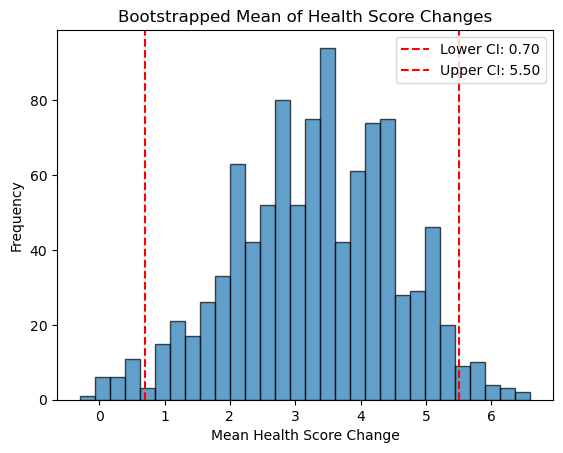

95% Confidence Interval: [0.70, 5.50]


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define the dataset manually
data_dict = {
    'PatientID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    'Gender': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    'InitialHealthScore': [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    'FinalHealthScore': [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

# Convert to DataFrame
data = pd.DataFrame(data_dict)

# Calculate the difference between Final and Initial Health Scores
data['HealthScoreChange'] = data['FinalHealthScore'] - data['InitialHealthScore']

# Define the bootstrapping function
def bootstrap_mean(data, n_bootstrap=1000):
    boot_means = []
    for _ in range(n_bootstrap):
        sample = np.random.choice(data, size=len(data), replace=True)
        boot_means.append(np.mean(sample))
    return boot_means

# Perform bootstrapping on the health score changes
boot_means = bootstrap_mean(data['HealthScoreChange'])

# Calculate 95% confidence interval
ci_lower = np.percentile(boot_means, 2.5)
ci_upper = np.percentile(boot_means, 97.5)

# Plotting the bootstrap results
plt.hist(boot_means, bins=30, edgecolor='k', alpha=0.7)
plt.axvline(ci_lower, color='red', linestyle='--', label=f'Lower CI: {ci_lower:.2f}')
plt.axvline(ci_upper, color='red', linestyle='--', label=f'Upper CI: {ci_upper:.2f}')
plt.title('Bootstrapped Mean of Health Score Changes')
plt.xlabel('Mean Health Score Change')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Print the confidence interval
print(f'95% Confidence Interval: [{ci_lower:.2f}, {ci_upper:.2f}]')


Null Hypothesis of "No Effect"
The null hypothesis (H₀) assumes the vaccine has no effect, meaning the average change in health scores (FinalHealthScore - InitialHealthScore) is zero.

Methodology Code
Bootstrapping involves:
Resampling HealthScoreChange with replacement.
Calculating the mean from each resample.
Creating a confidence interval from the bootstrapped means.


Findings and Discussion
If the confidence interval excludes zero, reject the null hypothesis (vaccine is effective).
If it includes zero, fail to reject the null (no significant effect).


Conclusion:
If the confidence interval does not include zero, conclude that there is evidence that the vaccine has an effect.
If the confidence interval includes zero, conclude that there is no significant evidence to suggest that the vaccine is effective.

ChatGPT Link:https://chatgpt.com/share/66ff204e-6480-800f-8a0e-156354d35cdc